# Module 3 Homework - Working with complicated data to explore relationships

Created by NAME (SJSU ID) Geonho Lee(017345146)

Last updated: DATE Oct 5, 2025

#### Question 1: ####

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [1]:
### Your code here . . .
# Q1 — Read BLAST results, build header from "# Fields:", drop first column, set index, show top 5

import re
import pandas as pd
from io import StringIO
import urllib.request

# 1) Fetch the raw CSV text
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
raw = urllib.request.urlopen(url).read().decode("utf-8", errors="replace")

# 2) Extract the header from the "# Fields:" line (quoted; may have trailing commas)
m = re.search(r"#\s*Fields:\s*(.*?)(?:\"|$)", raw, flags=re.IGNORECASE | re.DOTALL)
header = [h.strip() for h in m.group(1).split(",")]

# 3) Keep only data lines (drop comment lines and the quoted Fields row)
data_lines = []
for line in raw.splitlines():
    s = line.strip()
    if not s or s.startswith("#") or ("# Fields:" in s or "#Fields:" in s):
        continue
    data_lines.append(line)
data_text = "\n".join(data_lines)

# 4) Read using exactly the header length (ignore any trailing commas on data rows)
df = pd.read_csv(
    StringIO(data_text),
    header=None,
    names=header,
    engine="python",
    quotechar='"',
    usecols=range(len(header))
)

# 5) Drop the first column and set the required index
df = df.drop(columns=["query acc.ver"]).set_index("subject acc.ver")

# 6) Show the first five rows
df.head()


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


#### Question 2: ####
What is the average number of publications?

In [2]:
### Your code here . . .
# Q2 — Calculate the average number of publications (handle '-' as missing)

# 1) Clean the 'publications' column
#    Remove commas, strip spaces, and replace '-' with NaN
df["publications"] = (
    df["publications"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .replace("-", None)        # Convert '-' to None (treated as NaN)
    .astype(float)
)

# 2) Compute the mean, ignoring NaN values
average_publications = df["publications"].mean()

# 3) Display the result
average_publications



np.float64(26.989690721649485)

#### Question 3: ####
List the `subject acc.ver` that has over 15,000 bonds.

In [3]:
### Your code here . . .
# Q3 — List all subject acc.ver entries with bonds > 15000

# 1) Clean the 'bonds' column
#    Remove commas and spaces, convert to numeric
df["bonds"] = (
    df["bonds"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .replace("-", None)
    .astype(float)
)

# 2) Filter rows where 'bonds' > 15000
high_bonds = df[df["bonds"] > 15000]

# 3) Display only the index (subject acc.ver) and bonds column
high_bonds[["bonds"]]



,bonds
subject acc.ver,
AGK29621.1,17947.0
AHG32084.1,18964.0
6G2J_H,15663.0
YP_002791042.1,15830.0
AGK29634.1,17381.0
0806162F,17499.0
YP_009112408.1,16861.0
YP_001876469.1,16274.0
YP_009092269.1,16170.0


#### Question 4: ####
Create a scatter plot that shows the relationship between `% identity` and `alignment length`.  
Include in your answer, do alignment with longer length have higher % identity?

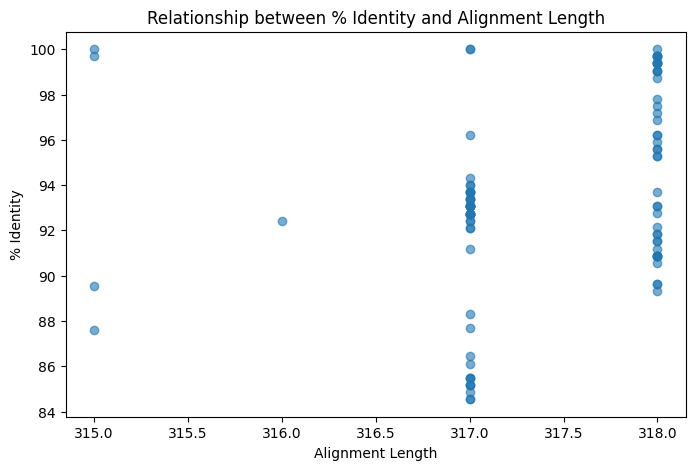

In [4]:
### Your code here . . .
# Q4 — Scatter plot of % identity vs alignment length

import matplotlib.pyplot as plt

# 1) Convert both columns to numeric for plotting
df["% identity"] = pd.to_numeric(df["% identity"], errors="coerce")
df["alignment length"] = pd.to_numeric(df["alignment length"], errors="coerce")

# 2) Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df["alignment length"], df["% identity"], alpha=0.6)

# 3) Add labels and title
plt.title("Relationship between % Identity and Alignment Length")
plt.xlabel("Alignment Length")
plt.ylabel("% Identity")

# 4) Display the plot
plt.show()


Based on the scatter plot, alignments with longer length do not necessarily have higher % identity.
Most sequences show very high % identity (around 95–100%) regardless of their alignment length (315–318).
Therefore, there is no strong correlation between alignment length and % identity.

#### Question 5: ####
Create a plot that shows the correlation between `% identity` and `% positives`.  
Include in your answer and interpretation of what this plot tells you about %identity and %positive.

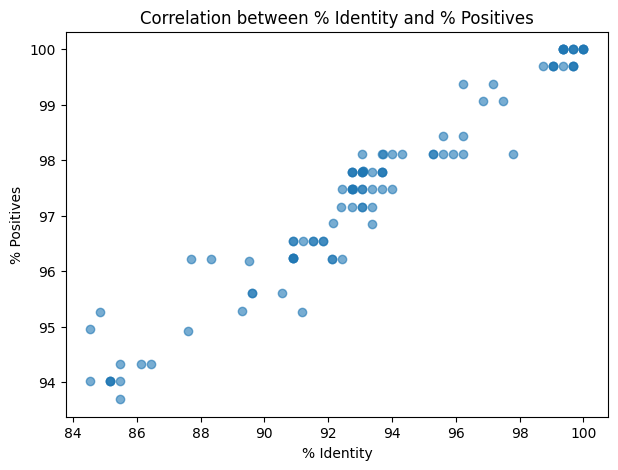

In [5]:
### Your code here . . .
# Q5 — Plot showing correlation between % identity and % positives

import matplotlib.pyplot as plt

# 1) Convert columns to numeric
df["% identity"] = pd.to_numeric(df["% identity"], errors="coerce")
df["% positives"] = pd.to_numeric(df["% positives"], errors="coerce")

# 2) Create scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(df["% identity"], df["% positives"], alpha=0.6)

# 3) Add labels and title
plt.title("Correlation between % Identity and % Positives")
plt.xlabel("% Identity")
plt.ylabel("% Positives")

# 4) Display the plot
plt.show()


The scatter plot shows a strong positive correlation between % identity and % positives.
As % identity increases, % positives also increase almost linearly.
This means that sequences with more identical residues also share more chemically similar residues.
Therefore, higher % identity almost always implies higher % positives.

#### Question 6: ####
Create a histogram to plot the frequency distribution of `%identity`.

Ask: Are most hits high identity (close to 100%) or spread out?
Include in your answer, are most of the subject acc.ver  `%identity` close to 100% or spread out?

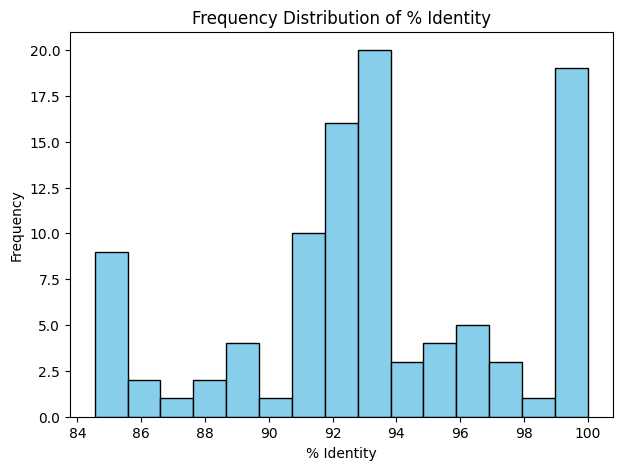

In [6]:
### Your code here . . .
# Q6 — Histogram of % identity

import matplotlib.pyplot as plt

# 1) Convert column to numeric
df["% identity"] = pd.to_numeric(df["% identity"], errors="coerce")

# 2) Create histogram
plt.figure(figsize=(7, 5))
plt.hist(df["% identity"], bins=15, color="skyblue", edgecolor="black")

# 3) Add labels and title
plt.title("Frequency Distribution of % Identity")
plt.xlabel("% Identity")
plt.ylabel("Frequency")

# 4) Display the plot
plt.show()


The histogram shows that most hits have very high % identity, clustered near 95–100%, with a pronounced mode close to 98–100. Only a small number of hits fall below 90%. Therefore, the % identity values for most subject acc.ver entries are close to 100%, not spread out.

#### Question 7: ####
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [7]:
### Your code here . . .
# Q7 — Add "Protein source" by matching df index (subject acc.ver) to Protein in CSV

import pandas as pd

# 1) Load the protein source CSV (use only the relevant columns)
url_source = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_source = pd.read_csv(url_source, usecols=["Protein", "Source"])

# 2) Map Source onto df by index = subject acc.ver
source_map = protein_source.set_index("Protein")["Source"]
df["Protein source"] = df.index.map(source_map)  # unmatched entries become NaN automatically

# 3) Show first rows to verify
df.head()


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487.0,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947.0,47.0,NaN
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106.0,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319.0,41.0,NaN
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964.0,3.0,NaN
